In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

In [2]:
df=pd.read_csv('forecasting-prj-sample-data-v0.1.csv')

In [3]:
df.head()

,Sr No,Date,Day If the Week,Occupancy Adults,Occupancy Children,Total Amount received today,Total Amount pending,Restaurant Lunch bill Amount,Restaurant Dinner bill Amount,In Room Dining Amount,Special Day Comments
0,1,01-Jul-19,Monday,0,0,0,0,0,0,0,NaN
1,2,02-Jul-19,Tuesday,0,0,0,0,0,0,0,NaN
2,3,03-Jul-19,Wednesday,2,1,6000,0,1000,1200,200,NaN
3,4,04-Jul-19,Thursday,2,1,6000,0,1000,1200,200,NaN
4,5,05-Jul-19,Friday,0,0,0,0,0,0,0,NaN


In [4]:
frame1=df.filter(['Date','Occupancy Adults'],axis=1)

In [5]:
frame1.head()

,Date,Occupancy Adults
0,01-Jul-19,0
1,02-Jul-19,0
2,03-Jul-19,2
3,04-Jul-19,2
4,05-Jul-19,0


In [6]:
frame1['Date']=pd.to_datetime(frame1['Date'])

In [7]:
frame1=frame1.set_index('Date')

In [8]:
frame1.head()

,Occupancy Adults
Date,
2019-07-01,0
2019-07-02,0
2019-07-03,2
2019-07-04,2
2019-07-05,0


In [10]:
daily_frame1=frame1.resample('D').mean()

In [12]:
f_frame1=daily_frame1.reset_index().dropna()

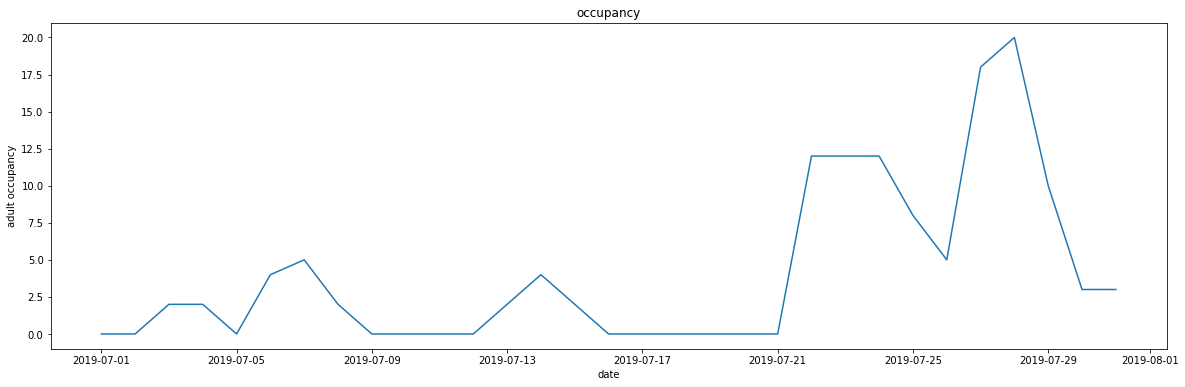

In [15]:
fig=plt.figure(figsize=(20,6))
plt.plot(f_frame1['Date'],f_frame1['Occupancy Adults'])
plt.title('occupancy')
plt.xlabel('date')
plt.ylabel('adult occupancy')


plt.show()

In [16]:
f_frame1.columns=['ds','y']

In [17]:
m=Prophet(yearly_seasonality=True,daily_seasonality=True)

In [18]:
m.fit(f_frame1)

INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


In [19]:
future=m.make_future_dataframe(periods=365)

In [20]:
forecast=m.predict(future)

In [21]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
391,2020-07-26,-172.931807,-176.483465,-169.687971
392,2020-07-27,-174.269707,-177.584293,-170.930793
393,2020-07-28,-177.901490,-181.163587,-174.667603
394,2020-07-29,-180.065569,-183.115540,-176.728091
395,2020-07-30,-186.806494,-190.216128,-183.369738


In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-01,-3.902150,-2.482459,4.538665,-3.902150,-3.902150,4.913767,4.913767,4.913767,-62.447955,...,1.390437,1.390437,1.390437,65.971285,65.971285,65.971285,0.0,0.0,0.0,1.011616
1,2019-07-02,-4.417871,-3.665191,3.223782,-4.417871,-4.417871,4.224224,4.224224,4.224224,-62.447955,...,-0.576206,-0.576206,-0.576206,67.248386,67.248386,67.248386,0.0,0.0,0.0,-0.193646
2,2019-07-03,-4.933592,-1.980642,4.922293,-4.933592,-4.933592,6.477263,6.477263,6.477263,-62.447955,...,0.401435,0.401435,0.401435,68.523784,68.523784,68.523784,0.0,0.0,0.0,1.543671
3,2019-07-04,-5.449312,-2.929351,3.829377,-5.449312,-5.449312,5.811848,5.811848,5.811848,-62.447955,...,-1.455331,-1.455331,-1.455331,69.715135,69.715135,69.715135,0.0,0.0,0.0,0.362536
4,2019-07-05,-5.965033,-4.273772,2.366247,-5.965033,-5.965033,5.105163,5.105163,5.105163,-62.447955,...,-3.204737,-3.204737,-3.204737,70.757855,70.757855,70.757855,0.0,0.0,0.0,-0.859870


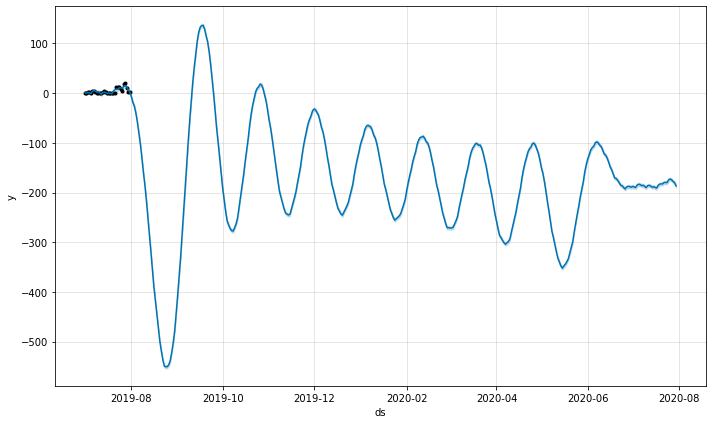

In [23]:
fig=m.plot(forecast)

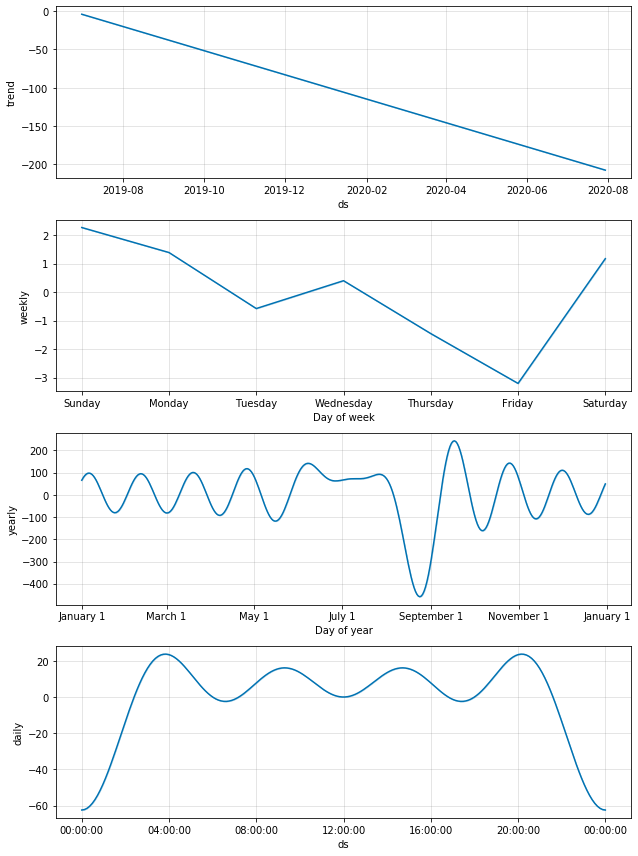

In [24]:
fig2=m.plot_components(forecast)

In [25]:
frame2=df.filter(['Date','Occupancy Children'],axis=1)

In [26]:
frame2['Date']=pd.to_datetime(frame2['Date'])

In [27]:
frame2=frame2.set_index('Date')

In [28]:
daily_frame2=frame2.resample('D').mean()

In [29]:
f_frame2=daily_frame2.reset_index().dropna()

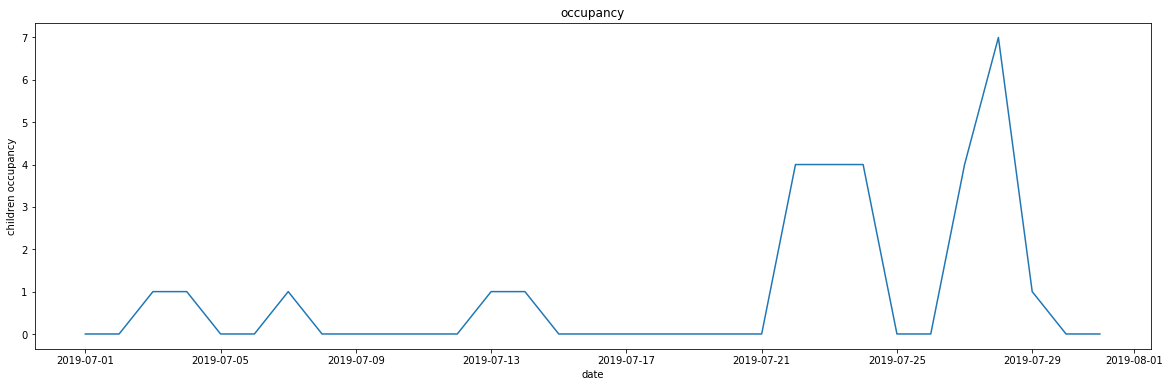

In [30]:
fig=plt.figure(figsize=(20,6))
plt.plot(f_frame2['Date'],f_frame2['Occupancy Children'])
plt.title('occupancy')
plt.xlabel('date')
plt.ylabel('children occupancy')


plt.show()

In [31]:
f_frame2.columns=['ds','y']

In [34]:
p=Prophet(yearly_seasonality=True,daily_seasonality=True)

In [35]:
p.fit(f_frame2)

INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


In [36]:
future=p.make_future_dataframe(periods=365)

In [37]:
forecast=p.predict(future)

In [38]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
391,2020-07-26,-41.334381,-42.865818,-39.802486
392,2020-07-27,-42.597760,-44.120212,-41.026295
393,2020-07-28,-43.280897,-44.750074,-41.696184
394,2020-07-29,-43.852579,-45.361653,-42.378215
395,2020-07-30,-46.433045,-47.886923,-44.813300


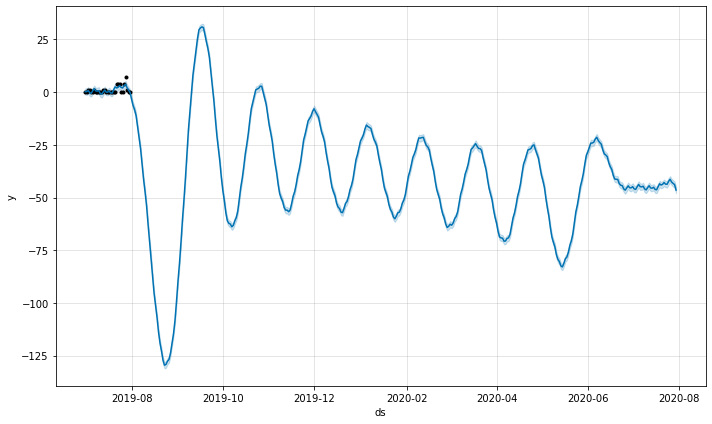

In [39]:
fig2=p.plot(forecast)

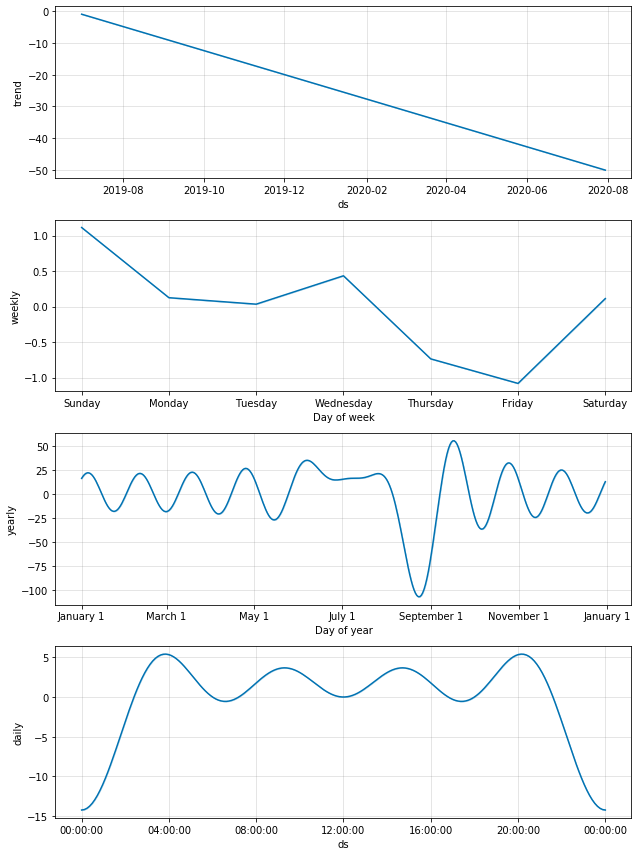

In [40]:
fig3=p.plot_components(forecast)